# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [34]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

In [7]:
X[1].min(), X[2].max()

(0, 2000)

In [ ]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float16)

In [ ]:
X_norm = X[1]

### Стандартизация

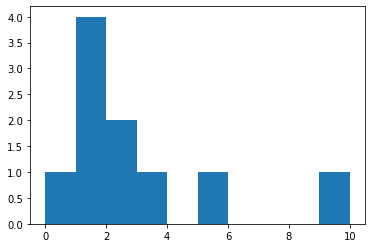

In [8]:
plt.hist(X[1]);

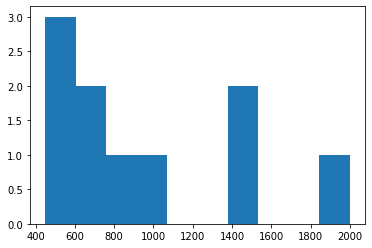

In [9]:
plt.hist(X[2]);

In [ ]:
X_st = X.copy().astype(float16)

In [13]:
X[1].mean(), X[1].std()

(2.6, 2.8000000000000003)

In [18]:
X_st1 = (X[1] - X[1].mean()) / X[1].std()
X_st2 = (X[2] - X[2].mean()) / X[2].std()

In [19]:
X_st[1], X_st[2]

(-0.5714285714285714, -0.2142857142857143)

In [21]:
def standartScaler(x):
    X_st = (x - x.mean()) / x.std()
    return X_st

In [22]:
standartScaler(X[1])

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [29]:
X_st[1] = standartScaler(X[1])
X_st[2] = standartScaler(X[2])
X_st[3] = standartScaler(X[3])

ValueError: setting an array element with a sequence.

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [30]:
def calc_mse(y, y_pred):
    return np.mean((y-y_pred)**2)

In [37]:
def eval_model(X, y, iterations, lr=0.001):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W = lr*(1/n) * np.dot((y-y_pred), X.T)
        if i % 100 == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [38]:
eval_model(X_st, y, iterations=1000, lr=0.001)

IndexError: tuple index out of range

In [ ]:
def eval_sgd_model(X, y, iterations, batch_size = 1, lr):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n//batch_size
    if n%batch_size != 0: 
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch)
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W = lr*(1/n) * np.dot((y-y_pred), X.T)
        if i % 100 == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [ ]:
def eval_model_reg2(X, y, iterations, lr=0.001, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W = lr*(2*(1/n) * np.dot((y-y_pred), X.T)
        if i % 100 == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.